In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# IMPORTING PACKAGES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


# ANALYSING DATASET

In [4]:
df.shape

(10337, 2)

In [5]:
df.info

<bound method DataFrame.info of                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]>

In [6]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [7]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [8]:
len(df[df.duplicated()])

66

In [9]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [10]:
df["Language"].nunique()

17

In [11]:
df["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

# ANALYSING VIA PLOTS

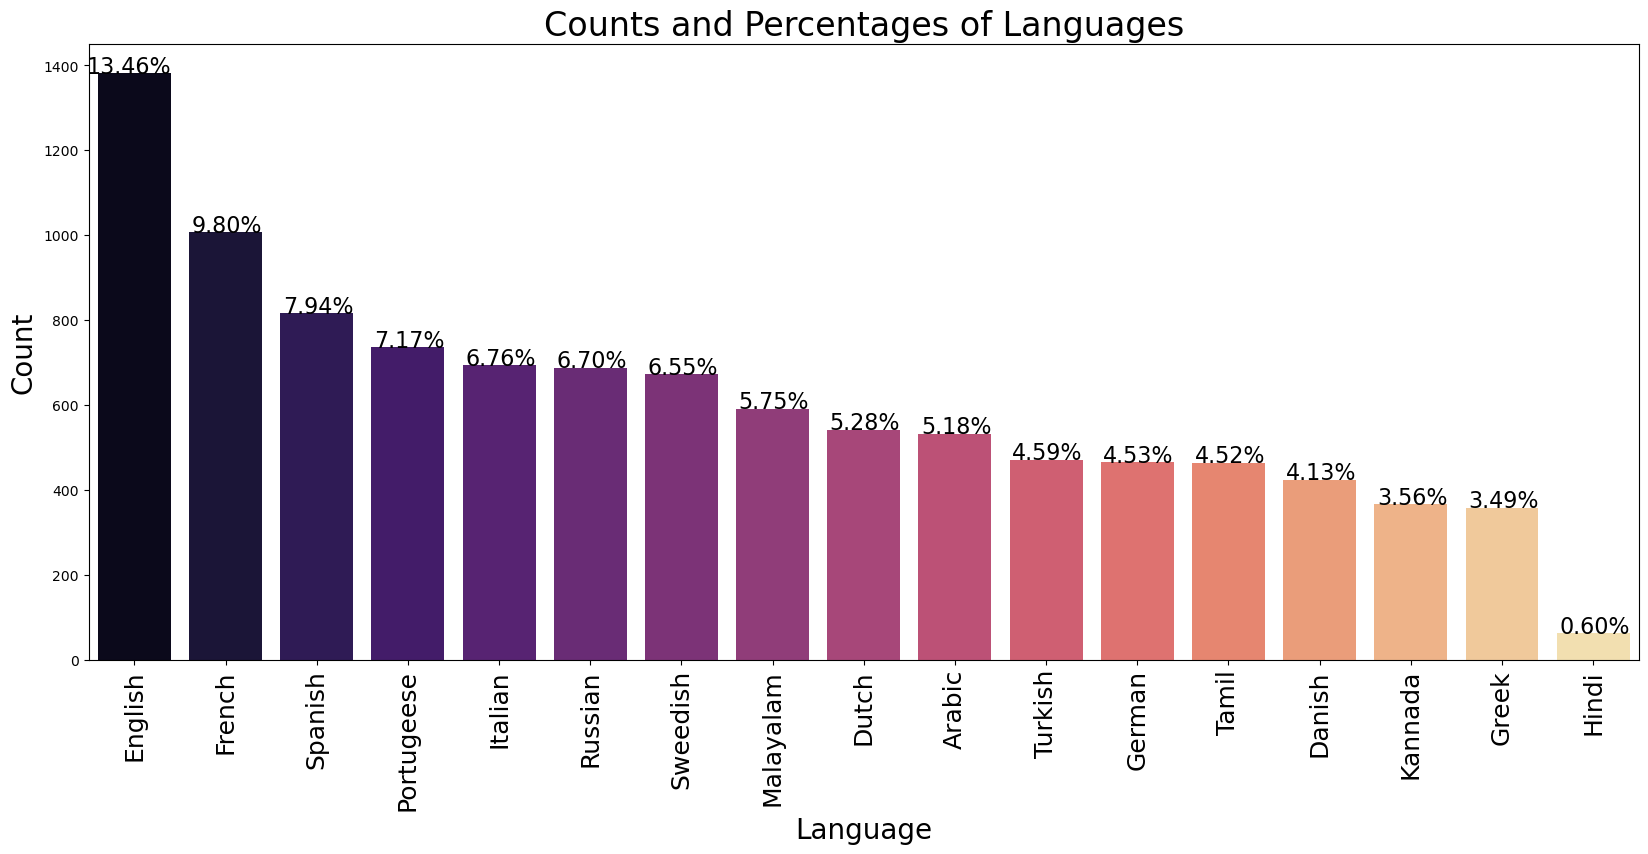

In [12]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha="right")
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [13]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


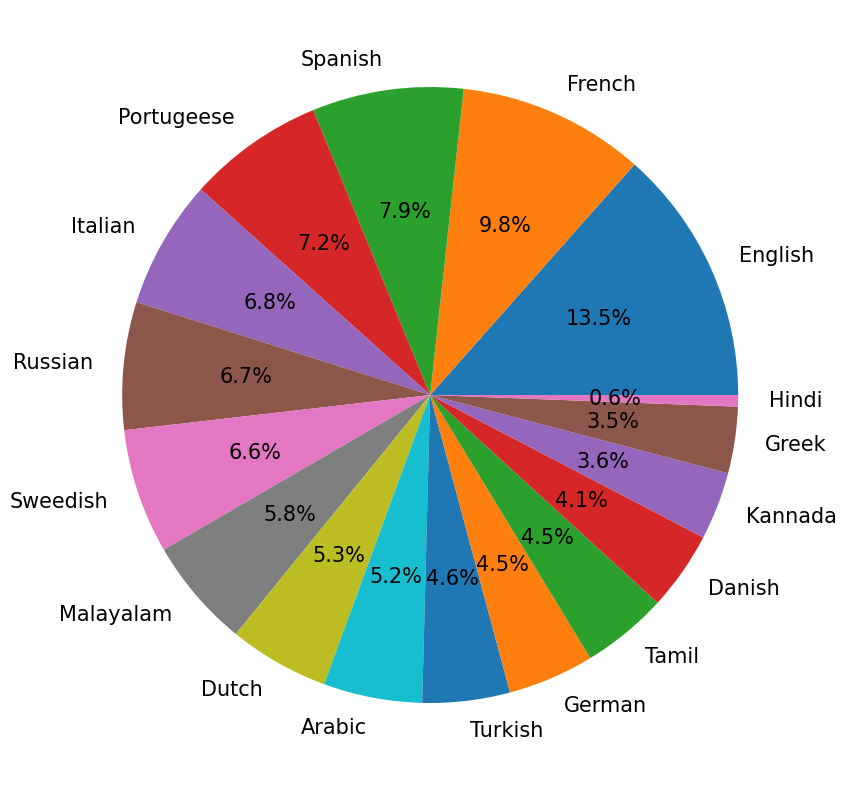

In [14]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()


# CLEANING THE TEXT

In [15]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [16]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [17]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [18]:
X=df1["cleaned_Text"]
y=df1["Language"]

In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

# SPLITTING DATASET

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV


models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Extra Trees' : ExtraTreesClassifier(),
    'MNB' : MultinomialNB(),
    'GNB' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Extra Tree' : ExtraTreeClassifier(),
    'Linear SVC' : LinearSVC(),
    'SVC' : SVC(),
    'Logistic Regression' : LogisticRegressionCV(),
    'SDG Classifier' : SGDClassifier(),
    'RidgeClassifierCV' : RidgeClassifierCV(),

}


# TESTING DIFFERENT MODELS

In [23]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
Extra Trees training started...
Extra Trees trained
MNB training started...
MNB trained
GNB training started...
GNB trained
Decision Tree training started...
Decision Tree trained
Extra Tree training started...
Extra Tree trained
Linear SVC training started...
Linear SVC trained
SVC training started...
SVC trained
Logistic Regression training started...
Logistic Regression trained
SDG Classifier training started...
SDG Classifier trained
RidgeClassifierCV training started...
RidgeClassifierCV trained
Wall time: 1h 40min 41s


In [24]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [25]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.524
Random Forest accuracy score :  0.927
Extra Trees accuracy score :  0.94
MNB accuracy score :  0.981
GNB accuracy score :  0.979
Decision Tree accuracy score :  0.873
Extra Tree accuracy score :  0.844
Linear SVC accuracy score :  0.955
SVC accuracy score :  0.874
Logistic Regression accuracy score :  0.953
SDG Classifier accuracy score :  0.963
RidgeClassifierCV accuracy score :  0.949
Wall time: 14min 28s


# The accuracy of the MNB model is 0.98 which is very good and our model is performing well.


In [26]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
       

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       146
           1       0.96      0.93      0.95       103
           2       0.98      0.92      0.95       133
           3       0.98      0.99      0.99       361
           4       0.99      0.95      0.97       255
           5       1.00      0.96      0.98       114
           6       1.00      0.95      0.97        79
           7       1.00      0.92      0.96        12
           8       0.97      0.92      0.95       159
           9       0.53      1.00      0.69        86
          10       1.00      0.98      0.99       161
          11       0.98      0.96      0.97       178
          12       1.00      0.97      0.99       150
          13       0.95      0.96      0.96       205
          14       0.97      0.95      0.96       182
          15       1.00      0.95      0.98       111
          16       0.99      0.88      0.93       133

    accuracy              

K-Nearest Neighbors ConfusionMatrix


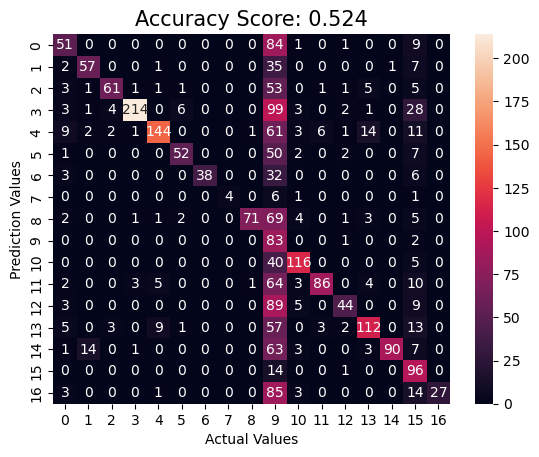

******************************
 
Random Forest ConfusionMatrix


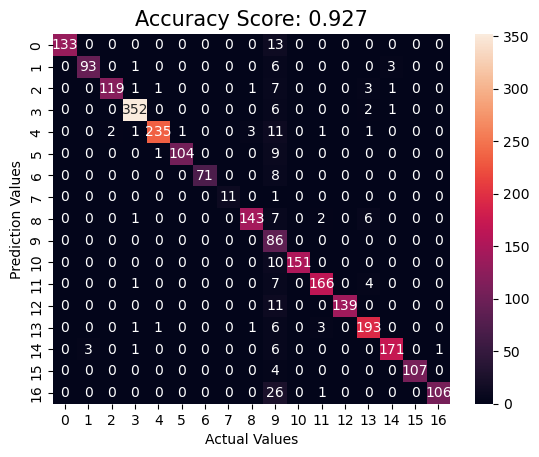

******************************
 
Extra Trees ConfusionMatrix


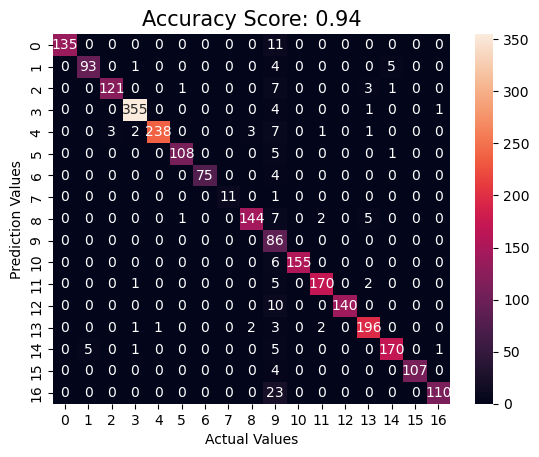

******************************
 
MNB ConfusionMatrix


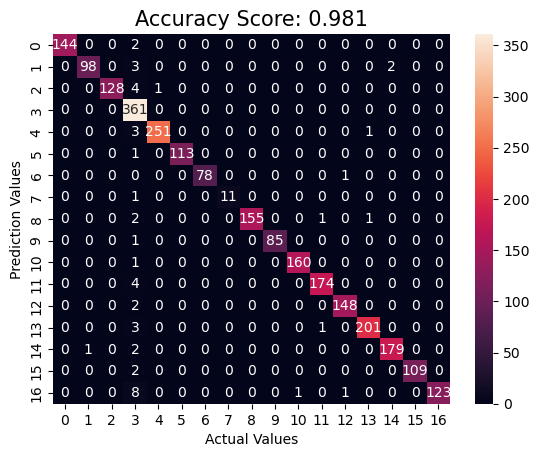

******************************
 
GNB ConfusionMatrix


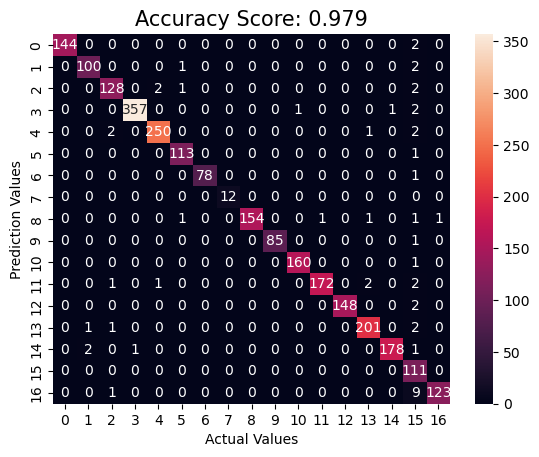

******************************
 
Decision Tree ConfusionMatrix


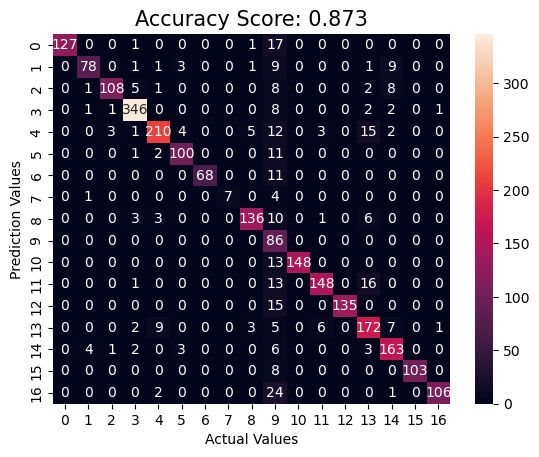

******************************
 
Extra Tree ConfusionMatrix


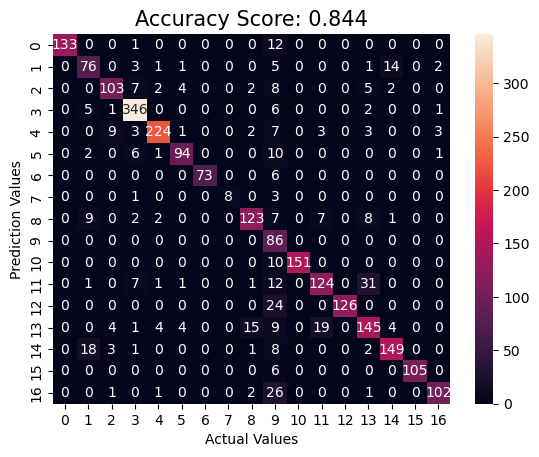

******************************
 
Linear SVC ConfusionMatrix


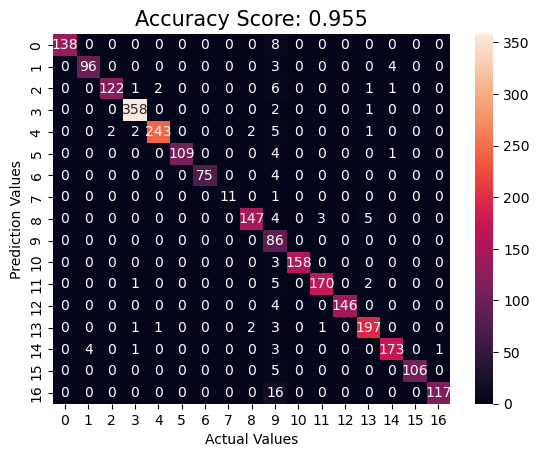

******************************
 
SVC ConfusionMatrix


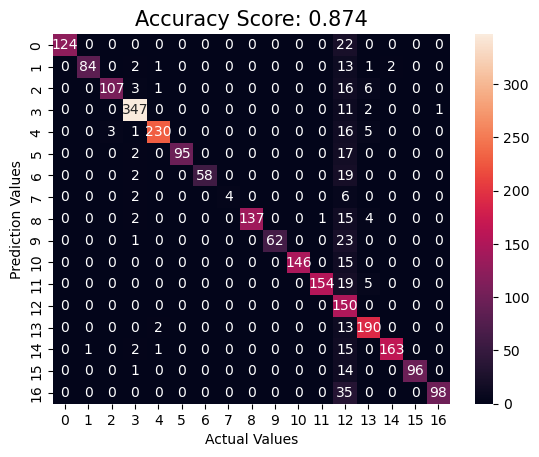

******************************
 
Logistic Regression ConfusionMatrix


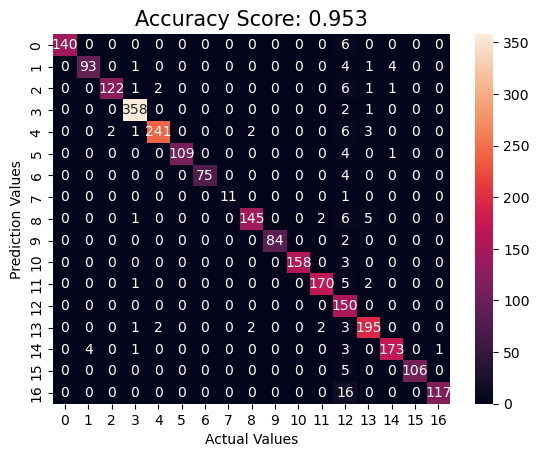

******************************
 
SDG Classifier ConfusionMatrix


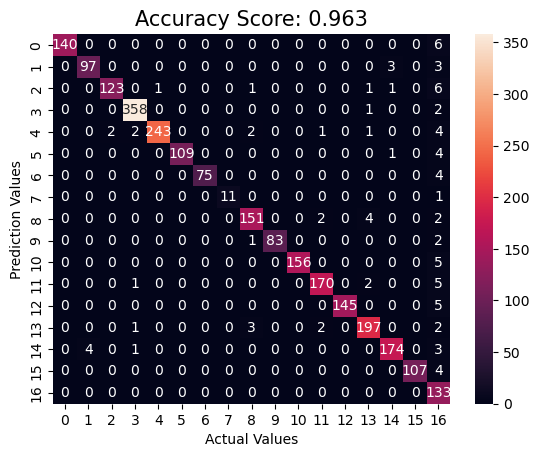

******************************
 
RidgeClassifierCV ConfusionMatrix


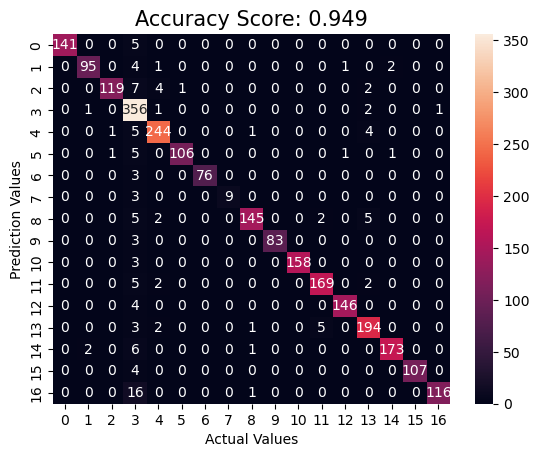

******************************
 


In [27]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

# PREDICTIONS

In [28]:

def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= lb.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [29]:
prediction("THIS IS MY FIRST NOTEBOOK ON KAGGLe ")

This word/sentence contains English word(s).


In [30]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(CV, open("transform.pkl", "wb"))